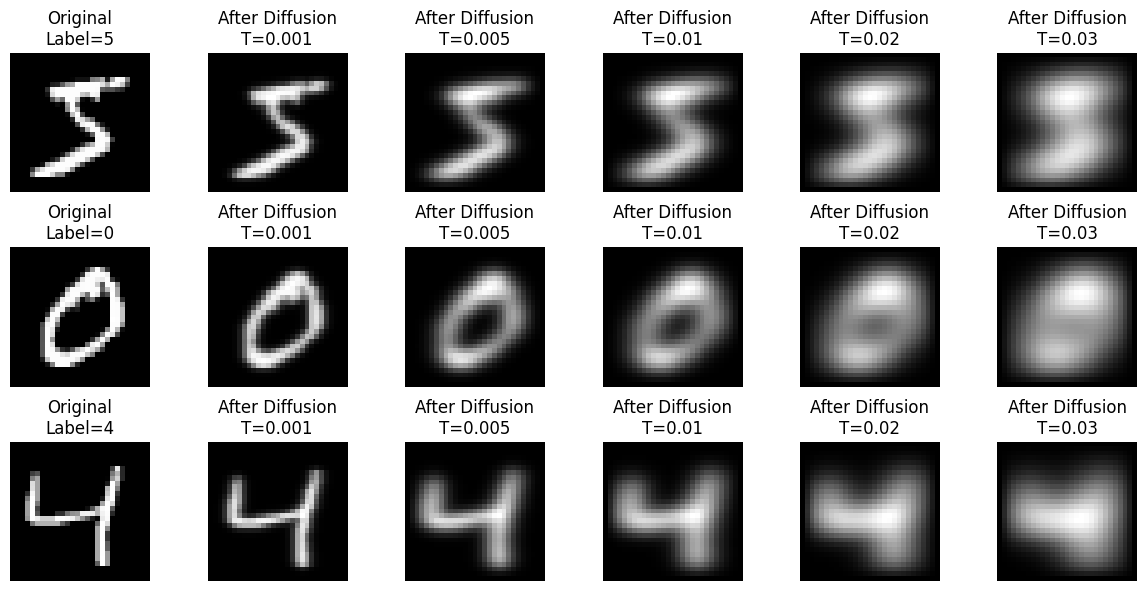

In [ ]:
'''The greater the value of 𝑇,the more the image becomes blurred and diffused. However, by choosing very low values for 𝛼 and 𝛽, this effect can be balanced.
Experiments have shown that it is preferable to use a small 𝑇 along with relatively higher values of α and 𝛽,as this approach requires less computation time.


'''

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0  # Normalize

# Parameters
Nx, Ny = 28, 28
Lx, Ly = 1.0, 1.0
dx = Lx / Nx
dy = Ly / Ny
x = np.linspace(0, Lx, Nx + 1)
y = np.linspace(0, Ly, Ny + 1)
X, Y = np.meshgrid(x, y, indexing='ij')

# Diffusion coefficients
def a(t, y): return 0.2
def b(t, x): return 0.5

# Thomas algorithm
def thomas(a, b, c, d):
    n = len(d)
    cp = np.zeros(n - 1)
    dp = np.zeros(n)
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1, n - 1):
        denom = b[i] - a[i - 1] * cp[i - 1]
        cp[i] = c[i] / denom
        dp[i] = (d[i] - a[i - 1] * dp[i - 1]) / denom
    dp[-1] = (d[-1] - a[-2] * dp[-2]) / (b[-1] - a[-2] * cp[-2])
    x = np.zeros(n)
    x[-1] = dp[-1]
    for i in reversed(range(n - 1)):
        x[i] = dp[i] - cp[i] * x[i + 1]
    return x

# Define T values to test
T_values = [0.001, 0.005, 0.01, 0.02, 0.03]  # try different T values
dt = 0.0001

# Indices of images to visualize
indices_to_show = [0, 1, 2]
num_samples = len(indices_to_show)

# Store results
originals = [x_train[idx] for idx in indices_to_show]
diffused_results = {T: [] for T in T_values}

# Main diffusion loop
for T in T_values:
    Nt = int(T / dt)

    for idx in indices_to_show:
        img = x_train[idx]
        u = np.zeros((Nx + 1, Ny + 1))
        u[1:Nx, 1:Ny] = img[0:Nx - 1, 0:Ny - 1]

        for n in range(Nt):
            t = n * dt
            u_half = np.copy(u)
            u_full = np.copy(u)

            for j in range(1, Ny):
                A = np.zeros(Nx - 1)
                B = np.zeros(Nx - 1)
                C = np.zeros(Nx - 1)
                D = np.zeros(Nx - 1)
                for i in range(1, Nx):
                    alpha = 0.5 * dt * a(t, y[j]) / dx**2
                    A[i - 1] = -alpha
                    B[i - 1] = 1 + 2 * alpha
                    C[i - 1] = -alpha
                    D[i - 1] = u[i, j]
                u_half[1:Nx, j] = thomas(A[1:], B, C[:-1], D)

            for i in range(1, Nx):
                A = np.zeros(Ny - 1)
                B = np.zeros(Ny - 1)
                C = np.zeros(Ny - 1)
                D = np.zeros(Ny - 1)
                for j in range(1, Ny):
                    beta = dt * b(t + dt / 2, x[i]) / dy**2
                    A[j - 1] = -beta
                    B[j - 1] = 1 + 2 * beta
                    C[j - 1] = -beta
                    D[j - 1] = u_half[i, j]
                u_full[i, 1:Ny] = thomas(A[1:], B, C[:-1], D)

            for j in range(1, Ny):
                A = np.zeros(Nx - 1)
                B = np.zeros(Nx - 1)
                C = np.zeros(Nx - 1)
                D = np.zeros(Nx - 1)
                for i in range(1, Nx):
                    alpha = 0.5 * dt * a(t + dt, y[j]) / dx**2
                    A[i - 1] = -alpha
                    B[i - 1] = 1 + 2 * alpha
                    C[i - 1] = -alpha
                    D[i - 1] = u_full[i, j]
                u[1:Nx, j] = thomas(A[1:], B, C[:-1], D)

        diffused_results[T].append(u)

# Plot the results
fig, axs = plt.subplots(num_samples, len(T_values) + 1, figsize=(12, num_samples * 2))

for i in range(num_samples):
    axs[i, 0].imshow(originals[i], cmap='gray')
    axs[i, 0].set_title(f"Original\nLabel={y_train[indices_to_show[i]]}")
    axs[i, 0].axis('off')

    for j, T in enumerate(T_values):
        axs[i, j + 1].imshow(diffused_results[T][i], cmap='gray')
        axs[i, j + 1].set_title(f"After Diffusion\nT={T}")
        axs[i, j + 1].axis('off')

plt.tight_layout()
plt.show()


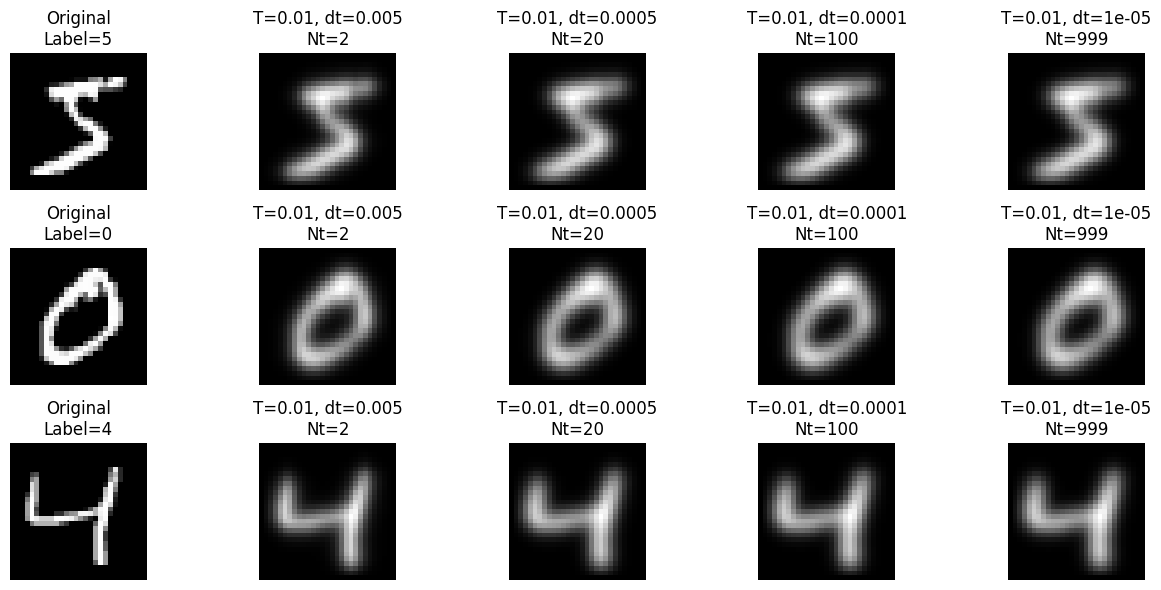

In [ ]:
#When we fixed the values of T, alpha, and beta, and varied dt, we observed that the differences between the resulting blurred images were very small.

'''
 For diffusion on MNIST images using our current implicit scheme and T=0.01, the output is not highly sensitive to dt in the tested range.
 This reflects both the numerical stability of the scheme and the robustness of the solution.
'''
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0  # Normalize

# Parameters
Nx, Ny = 28, 28
Lx, Ly = 1.0, 1.0
dx = Lx / Nx
dy = Ly / Ny
x = np.linspace(0, Lx, Nx + 1)
y = np.linspace(0, Ly, Ny + 1)
X, Y = np.meshgrid(x, y, indexing='ij')

# Diffusion coefficients (fixed)
def a(t, y): return 0.2
def b(t, x): return 0.2

# Thomas algorithm
def thomas(a, b, c, d):
    n = len(d)
    cp = np.zeros(n - 1)
    dp = np.zeros(n)
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1, n - 1):
        denom = b[i] - a[i - 1] * cp[i - 1]
        cp[i] = c[i] / denom
        dp[i] = (d[i] - a[i - 1] * dp[i - 1]) / denom
    dp[-1] = (d[-1] - a[-2] * dp[-2]) / (b[-1] - a[-2] * cp[-2])
    x = np.zeros(n)
    x[-1] = dp[-1]
    for i in reversed(range(n - 1)):
        x[i] = dp[i] - cp[i] * x[i + 1]
    return x

# Total diffusion time fixed
T = 0.01
dt_values = [0.005, 0.0005, 0.0001, 0.00001]

# Indices of images to visualize
indices_to_show = [0, 1, 2]
num_samples = len(indices_to_show)

# Store results
originals = [x_train[idx] for idx in indices_to_show]
diffused_results = {dt: [] for dt in dt_values}

# Main diffusion loop
for dt in dt_values:
    Nt = int(T / dt)

    for idx in indices_to_show:
        img = x_train[idx]
        u = np.zeros((Nx + 1, Ny + 1))
        u[1:Nx, 1:Ny] = img[0:Nx - 1, 0:Ny - 1]

        for n in range(Nt):
            t = n * dt
            u_half = np.copy(u)
            u_full = np.copy(u)

            for j in range(1, Ny):
                A = np.zeros(Nx - 1)
                B = np.zeros(Nx - 1)
                C = np.zeros(Nx - 1)
                D = np.zeros(Nx - 1)
                for i in range(1, Nx):
                    alpha = 0.5 * dt * a(t, y[j]) / dx**2
                    A[i - 1] = -alpha
                    B[i - 1] = 1 + 2 * alpha
                    C[i - 1] = -alpha
                    D[i - 1] = u[i, j]
                u_half[1:Nx, j] = thomas(A[1:], B, C[:-1], D)

            for i in range(1, Nx):
                A = np.zeros(Ny - 1)
                B = np.zeros(Ny - 1)
                C = np.zeros(Ny - 1)
                D = np.zeros(Ny - 1)
                for j in range(1, Ny):
                    beta = dt * b(t + dt / 2, x[i]) / dy**2
                    A[j - 1] = -beta
                    B[j - 1] = 1 + 2 * beta
                    C[j - 1] = -beta
                    D[j - 1] = u_half[i, j]
                u_full[i, 1:Ny] = thomas(A[1:], B, C[:-1], D)

            for j in range(1, Ny):
                A = np.zeros(Nx - 1)
                B = np.zeros(Nx - 1)
                C = np.zeros(Nx - 1)
                D = np.zeros(Nx - 1)
                for i in range(1, Nx):
                    alpha = 0.5 * dt * a(t + dt, y[j]) / dx**2
                    A[i - 1] = -alpha
                    B[i - 1] = 1 + 2 * alpha
                    C[i - 1] = -alpha
                    D[i - 1] = u_full[i, j]
                u[1:Nx, j] = thomas(A[1:], B, C[:-1], D)

        diffused_results[dt].append(u)

# Plot the results
fig, axs = plt.subplots(num_samples, len(dt_values) + 1, figsize=(13, num_samples * 2))

for i in range(num_samples):
    axs[i, 0].imshow(originals[i], cmap='gray')
    axs[i, 0].set_title(f"Original\nLabel={y_train[indices_to_show[i]]}")
    axs[i, 0].axis('off')

    for j, dt in enumerate(dt_values):
        axs[i, j + 1].imshow(diffused_results[dt][i], cmap='gray')
        axs[i, j + 1].set_title(f"T=0.01, dt={dt}\nNt={int(T / dt)}")
        axs[i, j + 1].axis('off')

plt.tight_layout()
plt.show()


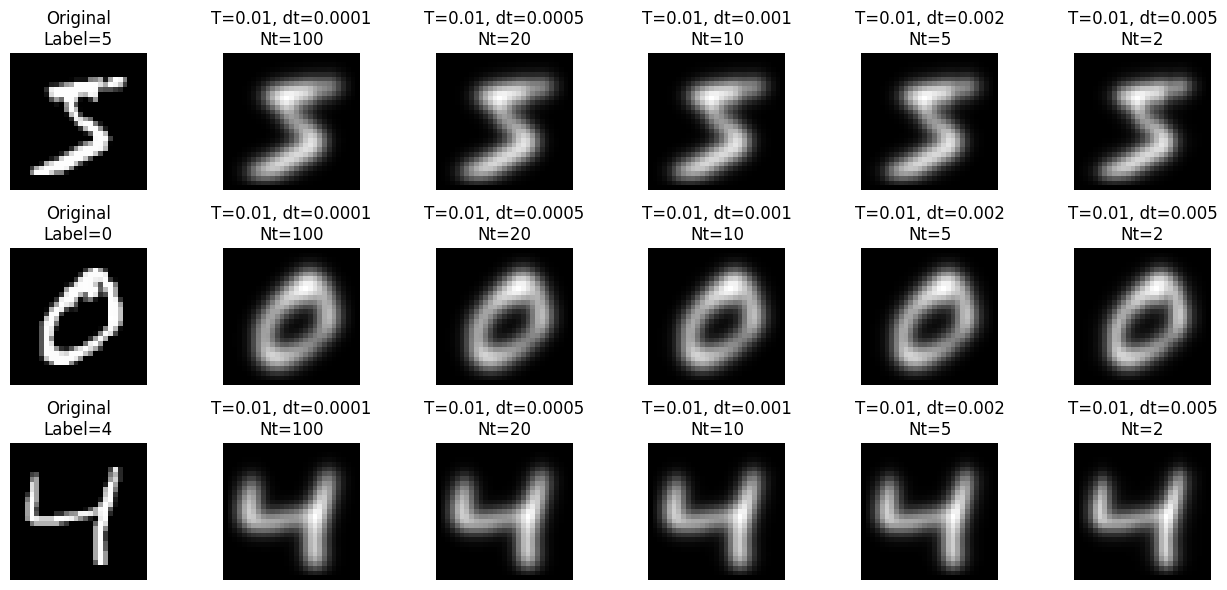


Numerical Differences Compared to Baseline (dt = 0.0001 , T = 0.01 ):

Sample 0 (Digit 5):
  dt = 0.00010 -> baseline
  dt = 0.00050 -> mean abs diff = 0.000501, max abs diff = 0.003399
  dt = 0.00100 -> mean abs diff = 0.001117, max abs diff = 0.007519
  dt = 0.00200 -> mean abs diff = 0.002320, max abs diff = 0.015479
  dt = 0.00500 -> mean abs diff = 0.005696, max abs diff = 0.038347

Sample 1 (Digit 0):
  dt = 0.00010 -> baseline
  dt = 0.00050 -> mean abs diff = 0.000658, max abs diff = 0.004983
  dt = 0.00100 -> mean abs diff = 0.001464, max abs diff = 0.010985
  dt = 0.00200 -> mean abs diff = 0.003028, max abs diff = 0.022243
  dt = 0.00500 -> mean abs diff = 0.007334, max abs diff = 0.050883

Sample 2 (Digit 4):
  dt = 0.00010 -> baseline
  dt = 0.00050 -> mean abs diff = 0.000702, max abs diff = 0.005015
  dt = 0.00100 -> mean abs diff = 0.001558, max abs diff = 0.011224
  dt = 0.00200 -> mean abs diff = 0.003199, max abs diff = 0.023357
  dt = 0.00500 -> mean abs diff = 0.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# === Load MNIST dataset ===
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0  # Normalize

# Parameters
Nx, Ny = 28, 28
Lx, Ly = 1.0, 1.0
dx = Lx / Nx
dy = Ly / Ny
x = np.linspace(0, Lx, Nx + 1)
y = np.linspace(0, Ly, Ny + 1)
X, Y = np.meshgrid(x, y, indexing='ij')

# Diffusion coefficients (fixed)
def a(t, y): return 0.2
def b(t, x): return 0.2

# Thomas algorithm
def thomas(a, b, c, d):
    n = len(d)
    cp = np.zeros(n - 1)
    dp = np.zeros(n)
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1, n - 1):
        denom = b[i] - a[i - 1] * cp[i - 1]
        cp[i] = c[i] / denom
        dp[i] = (d[i] - a[i - 1] * dp[i - 1]) / denom
    dp[-1] = (d[-1] - a[-2] * dp[-2]) / (b[-1] - a[-2] * cp[-2])
    x = np.zeros(n)
    x[-1] = dp[-1]
    for i in reversed(range(n - 1)):
        x[i] = dp[i] - cp[i] * x[i + 1]
    return x

# Total diffusion time fixed
T = 0.01
dt_values = [0.0001, 0.0005, 0.001, 0.002, 0.005]

# Indices of images to visualize
indices_to_show = [0, 1, 2]
num_samples = len(indices_to_show)

# Store results
originals = [x_train[idx] for idx in indices_to_show]
diffused_results = {dt: [] for dt in dt_values}

# Main diffusion loop
for dt in dt_values:
    Nt = int(T / dt)

    for idx in indices_to_show:
        img = x_train[idx]
        u = np.zeros((Nx + 1, Ny + 1))
        u[1:Nx, 1:Ny] = img[0:Nx - 1, 0:Ny - 1]

        for n in range(Nt):
            t = n * dt
            u_half = np.copy(u)
            u_full = np.copy(u)

            # Step 1: x-direction
            for j in range(1, Ny):
                A = np.zeros(Nx - 1)
                B = np.zeros(Nx - 1)
                C = np.zeros(Nx - 1)
                D = np.zeros(Nx - 1)
                for i in range(1, Nx):
                    alpha = 0.5 * dt * a(t, y[j]) / dx**2
                    A[i - 1] = -alpha
                    B[i - 1] = 1 + 2 * alpha
                    C[i - 1] = -alpha
                    D[i - 1] = u[i, j]
                u_half[1:Nx, j] = thomas(A[1:], B, C[:-1], D)

            # Step 2: y-direction
            for i in range(1, Nx):
                A = np.zeros(Ny - 1)
                B = np.zeros(Ny - 1)
                C = np.zeros(Ny - 1)
                D = np.zeros(Ny - 1)
                for j in range(1, Ny):
                    beta = dt * b(t + dt / 2, x[i]) / dy**2
                    A[j - 1] = -beta
                    B[j - 1] = 1 + 2 * beta
                    C[j - 1] = -beta
                    D[j - 1] = u_half[i, j]
                u_full[i, 1:Ny] = thomas(A[1:], B, C[:-1], D)

            # Step 3: x-direction again
            for j in range(1, Ny):
                A = np.zeros(Nx - 1)
                B = np.zeros(Nx - 1)
                C = np.zeros(Nx - 1)
                D = np.zeros(Nx - 1)
                for i in range(1, Nx):
                    alpha = 0.5 * dt * a(t + dt, y[j]) / dx**2
                    A[i - 1] = -alpha
                    B[i - 1] = 1 + 2 * alpha
                    C[i - 1] = -alpha
                    D[i - 1] = u_full[i, j]
                u[1:Nx, j] = thomas(A[1:], B, C[:-1], D)

        diffused_results[dt].append(u)

# Plot the results
fig, axs = plt.subplots(num_samples, len(dt_values) + 1, figsize=(13, num_samples * 2))

for i in range(num_samples):
    axs[i, 0].imshow(originals[i], cmap='gray')
    axs[i, 0].set_title(f"Original\nLabel={y_train[indices_to_show[i]]}")
    axs[i, 0].axis('off')

    for j, dt in enumerate(dt_values):
        axs[i, j + 1].imshow(diffused_results[dt][i], cmap='gray')
        axs[i, j + 1].set_title(f"T=0.01, dt={dt}\nNt={int(T / dt)}")
        axs[i, j + 1].axis('off')

plt.tight_layout()
plt.show()

# Print numerical differences (compared to smallest dt baseline)
baseline_dt = min(dt_values)
print("\nNumerical Differences Compared to Baseline (dt =", baseline_dt, ", T =", T, "):\n")

for i, idx in enumerate(indices_to_show):
    baseline = diffused_results[baseline_dt][i]
    print(f"Sample {i} (Digit {y_train[idx]}):")
    for dt in dt_values:
        if dt == baseline_dt:
            print(f"  dt = {dt:.5f} -> baseline")
        else:
            diff = np.abs(diffused_results[dt][i] - baseline)
            mean_diff = np.mean(diff)
            max_diff = np.max(diff)
            print(f"  dt = {dt:.5f} -> mean abs diff = {mean_diff:.6f}, max abs diff = {max_diff:.6f}")
    print()


Since explicit schemes operate faster, we decided to examine their behavior experimentally as well. The conclusion is that explicit schemes are sensitive to the value of Δ𝑡 and become unstable when Δt is increased beyond a certain threshold. Therefore, when using explicit methods, the time step Δt must satisfy a stability condition.

dt_chosen = 0.00102041


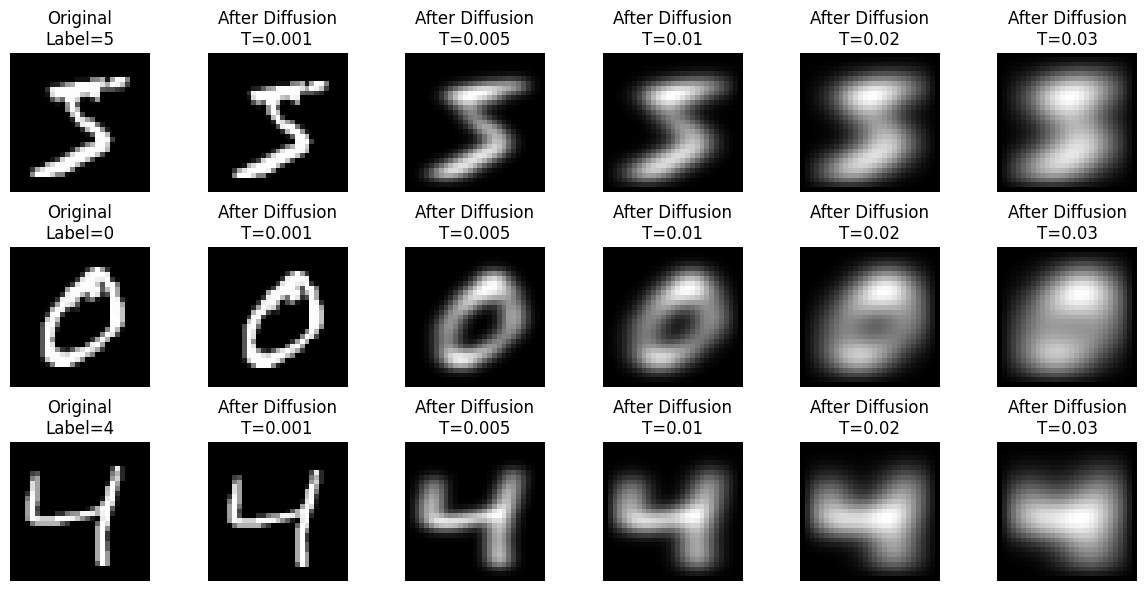

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0  # Normalize

# Parameters
Nx, Ny = 28, 28
Lx, Ly = 1.0, 1.0
dx = Lx / Nx
dy = Ly / Ny
x = np.linspace(0, Lx, Nx + 1)
y = np.linspace(0, Ly, Ny + 1)
X, Y = np.meshgrid(x, y, indexing='ij')

# Constant diffusion coefficients
def a(t, y):
    return 0.2

def b(t, x):
    return 0.5

# Stability analysis for explicit schemes
a_max = 0.2
b_max = 0.5

# Stability constraints: dt ≤ dx²/(2*a_max) and dt ≤ dy²/(2*b_max)
dt_stable_x = dx**2 / (2 * a_max)
dt_stable_y = dy**2 / (2 * b_max)
dt_max = min(dt_stable_x, dt_stable_y)

# Use smaller time step for stability (safety factor)
dt = 0.8 * dt_max
print(f"dt_chosen = {dt:.8f}")

# Define T values to test
T_values = [0.001, 0.005, 0.01, 0.02, 0.03]

# Explicit diffusion step in x-direction
def explicit_x_step(u, dt_step, t):
    """Apply explicit diffusion in x-direction for time step dt_step"""
    u_new = np.copy(u)

    for j in range(1, Ny):
        for i in range(1, Nx):
            a_val = a(t, y[j])
            # Second derivative approximation
            d2u_dx2 = (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2
            u_new[i, j] = u[i, j] + dt_step * a_val * d2u_dx2

    return u_new

# Explicit diffusion step in y-direction
def explicit_y_step(u, dt_step, t):
    """Apply explicit diffusion in y-direction for time step dt_step"""
    u_new = np.copy(u)

    for i in range(1, Nx):
        for j in range(1, Ny):
            b_val = b(t, x[i])
            # Second derivative approximation
            d2u_dy2 = (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            u_new[i, j] = u[i, j] + dt_step * b_val * d2u_dy2

    return u_new

# Indices of images to visualize
indices_to_show = [0, 1, 2]
num_samples = len(indices_to_show)

# Store results
originals = [x_train[idx] for idx in indices_to_show]
diffused_results = {T: [] for T in T_values}

# Main diffusion loop
for T in T_values:
    Nt = int(T / dt)

    for idx in indices_to_show:
        img = x_train[idx]
        u = np.zeros((Nx + 1, Ny + 1))
        u[1:Nx, 1:Ny] = img[0:Nx - 1, 0:Ny - 1]

        for n in range(Nt):
            t = n * dt

            # Explicit Strang splitting: X(dt/2) → Y(dt) → X(dt/2)
            u = explicit_x_step(u, dt/2, t)
            u = explicit_y_step(u, dt, t + dt/2)
            u = explicit_x_step(u, dt/2, t + dt)

        diffused_results[T].append(u)

# Plot the results
fig, axs = plt.subplots(num_samples, len(T_values) + 1, figsize=(12, num_samples * 2))

for i in range(num_samples):
    axs[i, 0].imshow(originals[i], cmap='gray')
    axs[i, 0].set_title(f"Original\nLabel={y_train[indices_to_show[i]]}")
    axs[i, 0].axis('off')

    for j, T in enumerate(T_values):
        axs[i, j + 1].imshow(diffused_results[T][i], cmap='gray')
        axs[i, j + 1].set_title(f"After Diffusion\nT={T}")
        axs[i, j + 1].axis('off')

plt.tight_layout()
plt.show()

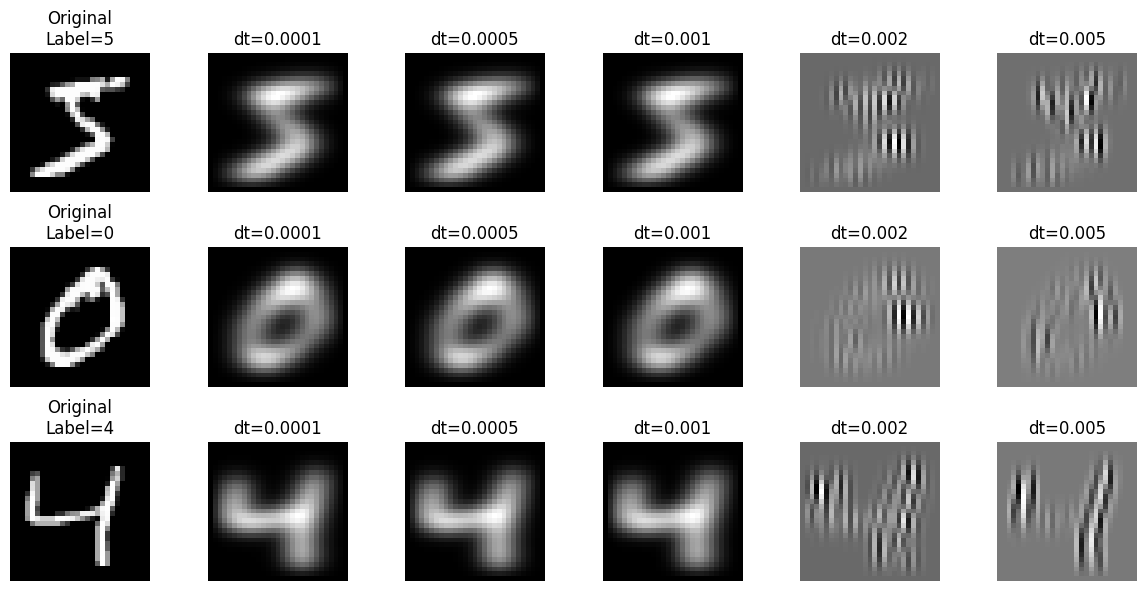

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0  # Normalize

# Parameters
Nx, Ny = 28, 28
Lx, Ly = 1.0, 1.0
dx = Lx / Nx
dy = Ly / Ny
x = np.linspace(0, Lx, Nx + 1)
y = np.linspace(0, Ly, Ny + 1)
X, Y = np.meshgrid(x, y, indexing='ij')

# Fixed diffusion coefficients
def a(t, y):
    return 0.2

def b(t, x):
    return 0.5

# Fixed total time
T = 0.01
dt_values = [0.0001, 0.0005, 0.001, 0.002, 0.005]

# Explicit diffusion step in x-direction
def explicit_x_step(u, dt_step, t):
    u_new = np.copy(u)
    for j in range(1, Ny):
        for i in range(1, Nx):
            a_val = a(t, y[j])
            d2u_dx2 = (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2
            u_new[i, j] = u[i, j] + dt_step * a_val * d2u_dx2
    return u_new

# Explicit diffusion step in y-direction
def explicit_y_step(u, dt_step, t):
    u_new = np.copy(u)
    for i in range(1, Nx):
        for j in range(1, Ny):
            b_val = b(t, x[i])
            d2u_dy2 = (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            u_new[i, j] = u[i, j] + dt_step * b_val * d2u_dy2
    return u_new

# Indices of images to visualize
indices_to_show = [0, 1, 2]
num_samples = len(indices_to_show)

# Store results
originals = [x_train[idx] for idx in indices_to_show]
diffused_results = {dt: [] for dt in dt_values}

# Main diffusion loop
for dt in dt_values:
    Nt = int(T / dt)

    for idx in indices_to_show:
        img = x_train[idx]
        u = np.zeros((Nx + 1, Ny + 1))
        u[1:Nx, 1:Ny] = img[0:Nx - 1, 0:Ny - 1]

        for n in range(Nt):
            t = n * dt

            # Explicit Strang splitting: X(dt/2) → Y(dt) → X(dt/2)
            u = explicit_x_step(u, dt/2, t)
            u = explicit_y_step(u, dt, t + dt/2)
            u = explicit_x_step(u, dt/2, t + dt)

        diffused_results[dt].append(u)

# Plot the results
fig, axs = plt.subplots(num_samples, len(dt_values) + 1, figsize=(12, num_samples * 2))

for i in range(num_samples):
    axs[i, 0].imshow(originals[i], cmap='gray')
    axs[i, 0].set_title(f"Original\nLabel={y_train[indices_to_show[i]]}")
    axs[i, 0].axis('off')

    for j, dt in enumerate(dt_values):
        axs[i, j + 1].imshow(diffused_results[dt][i], cmap='gray')
        axs[i, j + 1].set_title(f"dt={dt}")
        axs[i, j + 1].axis('off')

plt.tight_layout()
plt.show()

Next, we moved toward adapting this model to resemble one capable of solving a classification problem. This involved introducing backpropagation and making
𝛼 and β learnable parameters. We explored modifying them not only as scalars but also as time-dependent vectors or matrices. The core mathematical logic is described here, and the conclusions drawn from the experiments are used to guide further development.